In [1]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\bhavya\Desktop\git\python-2\project\Drug_Data.csv"
df = pd.read_csv(file_path)

# Display column names and data types
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100526 entries, 0 to 100525
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Condition     100526 non-null  object 
 1   Drug          100526 non-null  object 
 2   Indication    100526 non-null  object 
 3   Type          100526 non-null  object 
 4   Reviews       100526 non-null  object 
 5   Effective     100526 non-null  float64
 6   EaseOfUse     100526 non-null  float64
 7   Satisfaction  100526 non-null  float64
 8   Information   100526 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.9+ MB
None
                   Condition                         Drug Indication Type  \
0  Acute Bacterial Sinusitis                 Levofloxacin   On Label   RX   
1  Acute Bacterial Sinusitis                 Moxifloxacin   On Label   RX   
2  Acute Bacterial Sinusitis                 Azithromycin   On Label   RX   
3  Acute Bacterial Sinusitis  Amoxicillin

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Check basic stats of numerical features
print(df.describe())

           Effective      EaseOfUse   Satisfaction
count  100526.000000  100526.000000  100526.000000
mean        3.537109       3.935037       3.178326
std         1.122137       1.048564       1.225872
min         0.950007       0.950036       0.950006
25%         2.990223       3.511813       2.365056
50%         3.700000       4.086120       3.100553
75%         4.328519       4.818468       4.024897
max         5.049998       5.049992       5.049994


In [4]:
# Check number of rows and columns
print(df.shape)

# Check for categorical and numerical columns
print(df.dtypes)

(100526, 9)
Condition        object
Drug             object
Indication       object
Type             object
Reviews          object
Effective       float64
EaseOfUse       float64
Satisfaction    float64
Information      object
dtype: object


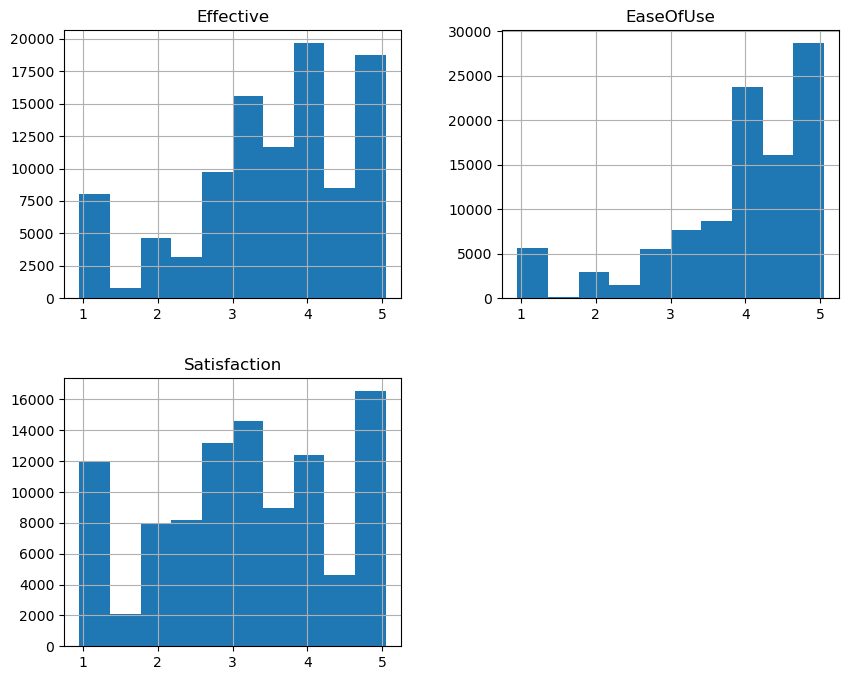

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical features
df.hist(figsize=(10, 8))
plt.show()

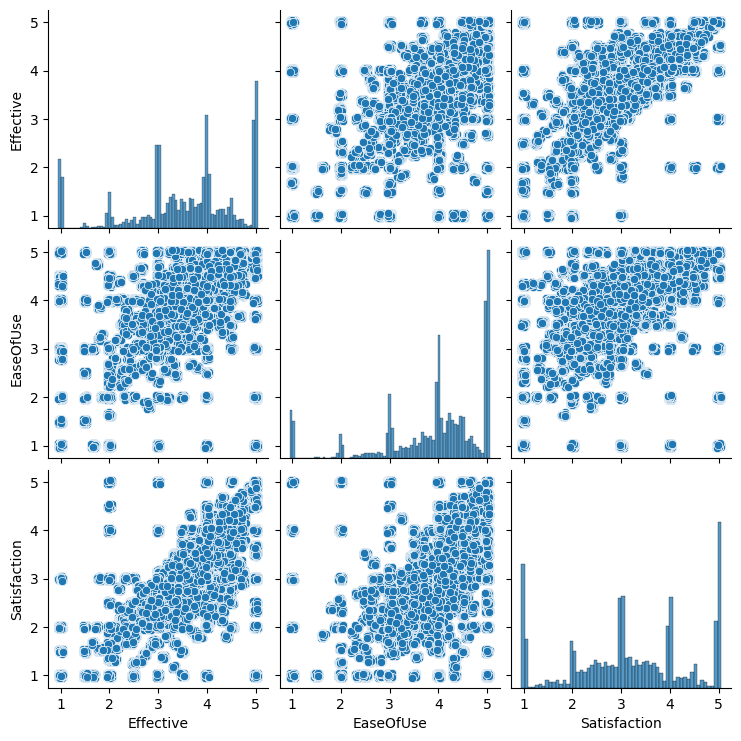

In [6]:
# Pairplot for numerical columns
sns.pairplot(df)
plt.show()

In [10]:
# Check column data types
print(df.dtypes)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Condition        object
Drug             object
Indication       object
Type             object
Reviews          object
Effective       float64
EaseOfUse       float64
Satisfaction    float64
Information      object
dtype: object
Categorical Columns: Index(['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Information'], dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later use

In [12]:
df = pd.get_dummies(df, drop_first=True)

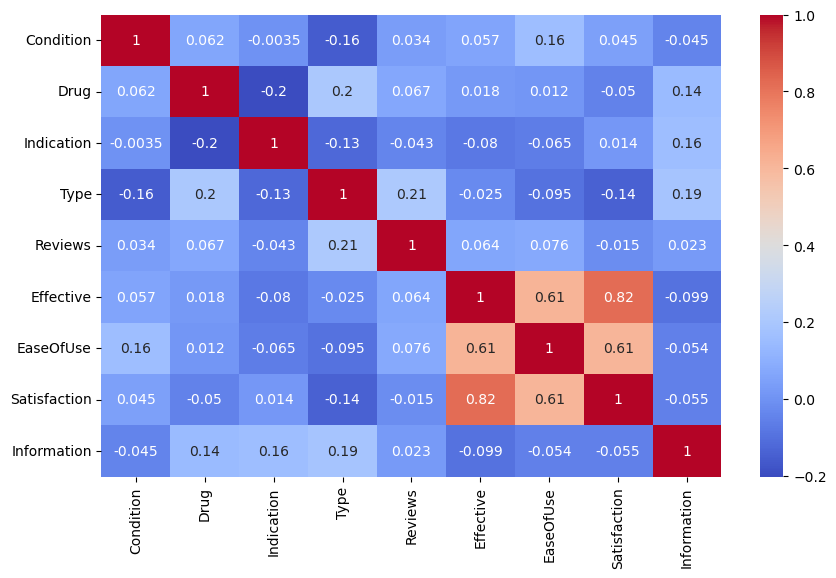

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
print(df.isnull().sum())

# Treat missing values
df.fillna(df.mean(), inplace=True)

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64


In [15]:
# Check duplicates
print(df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

0


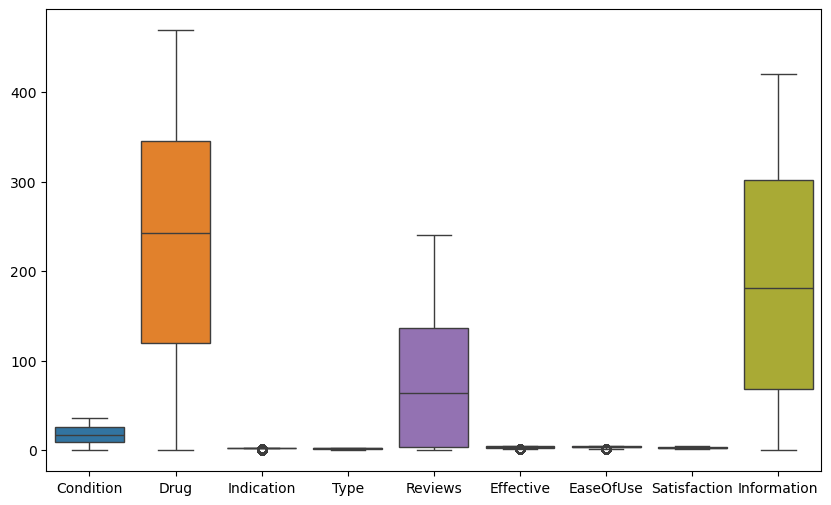

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

In [18]:
from scipy import stats
import numpy as np
# Removing outliers beyond 3 standard deviations
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

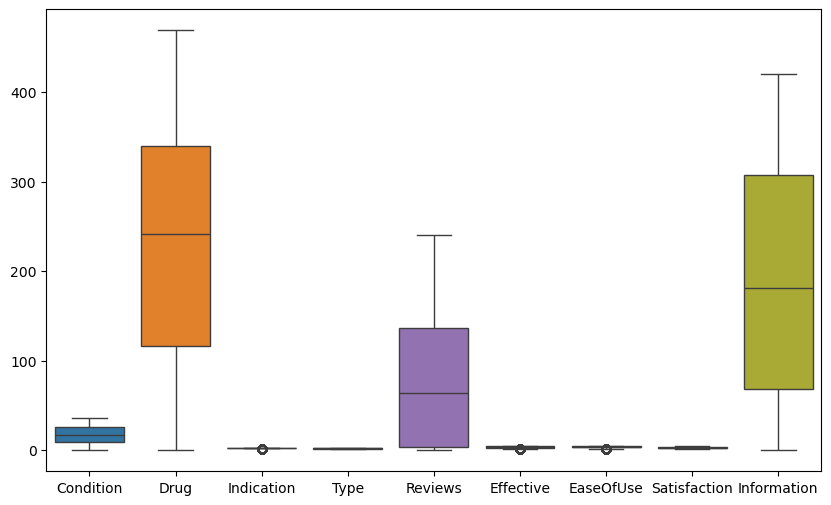

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

In [20]:
# Feature selection using correlation
correlation = df.corr().abs()
selected_features = correlation[correlation > 0.2].index
df = df[selected_features]

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

        feature        VIF
0     Condition   3.772846
1          Drug   4.256331
2    Indication  11.928576
3          Type  11.618777
4       Reviews   2.522878
5     Effective  37.309459
6     EaseOfUse  23.771946
7  Satisfaction  26.778163
8   Information   3.647636


In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)